In [2]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [4]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [5]:
# mat1=scipy.io.loadmat('/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/nina_DB4_prep_olsson.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_test=mat1['Testing_process_data'] 
# print('raw_Train_data',nina_raw_train)
# print('raw_Test_data',nina_raw_test)

In [6]:
# # files.upload()
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/nina_DB4_Train.csv", nina_raw_train, delimiter=",")

In [7]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/nina_DB4_Test.csv", nina_raw_test, delimiter=",")

In [8]:
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program

LABELS=[]
for i in range(1,53,1):
  LABELS.append (i)
print(LABELS)

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [9]:
# The number of steps within one time segment
TIME_PERIODS = 100
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 50
n_features = 12

In [10]:
def read_data_Train(file_path_Train):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [11]:
def read_data_Test(file_path_Test):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [12]:
# Load data set containing all the data from csv
df_Train = read_data_Train('/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/nina_DB4_Train.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 10400000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,0.0,-1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,-5.0,1.0
1,3.0,4.0,6.0,7.0,0.0,-8.0,-5.0,-7.0,-3.0,-1.0,-1.0,0.0,1.0
2,7.0,9.0,12.0,14.0,0.0,-17.0,-10.0,-15.0,-7.0,-2.0,0.0,6.0,1.0
3,9.0,13.0,17.0,19.0,0.0,-24.0,-14.0,-22.0,-10.0,-4.0,0.0,12.0,1.0
4,11.0,16.0,21.0,23.0,0.0,-30.0,-17.0,-27.0,-12.0,-5.0,1.0,17.0,1.0
5,12.0,18.0,23.0,26.0,0.0,-34.0,-19.0,-32.0,-13.0,-6.0,1.0,22.0,1.0
6,12.0,19.0,24.0,27.0,0.0,-36.0,-19.0,-35.0,-13.0,-7.0,1.0,26.0,1.0
7,10.0,19.0,24.0,27.0,0.0,-37.0,-18.0,-37.0,-12.0,-8.0,0.0,29.0,1.0
8,8.0,18.0,22.0,25.0,0.0,-37.0,-16.0,-37.0,-10.0,-8.0,-2.0,31.0,1.0
9,5.0,15.0,20.0,23.0,0.0,-35.0,-14.0,-35.0,-6.0,-7.0,-3.0,32.0,1.0


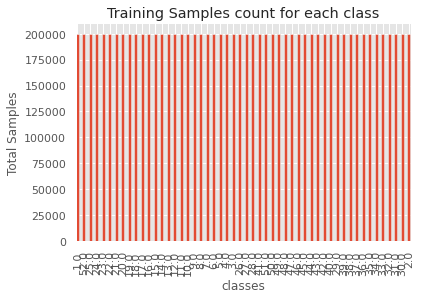

In [13]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [14]:
df_Test = read_data_Test('/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/nina_DB4_Test.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)

Number of columns in the dataframe: 13
Number of rows in the dataframe: 5200000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class_label
0,-3.0,2.0,0.0,2.0,1.0,2.0,5.0,-3.0,0.0,-4.0,1.0,-2.0,1.0
1,20.0,2.0,-9.0,8.0,-8.0,-7.0,-5.0,22.0,-3.0,1.0,4.0,-16.0,1.0
2,44.0,2.0,-17.0,15.0,-17.0,-15.0,-13.0,46.0,-6.0,6.0,8.0,-29.0,1.0
3,65.0,1.0,-26.0,21.0,-26.0,-23.0,-21.0,66.0,-8.0,11.0,11.0,-41.0,1.0
4,84.0,0.0,-32.0,27.0,-33.0,-29.0,-27.0,82.0,-9.0,16.0,15.0,-51.0,1.0
5,99.0,-3.0,-38.0,32.0,-39.0,-34.0,-32.0,92.0,-8.0,21.0,18.0,-60.0,1.0
6,110.0,-6.0,-42.0,37.0,-44.0,-38.0,-34.0,97.0,-7.0,26.0,20.0,-66.0,1.0
7,117.0,-10.0,-44.0,41.0,-47.0,-39.0,-34.0,97.0,-4.0,31.0,22.0,-70.0,1.0
8,119.0,-15.0,-45.0,44.0,-47.0,-39.0,-32.0,91.0,-1.0,35.0,24.0,-72.0,1.0
9,117.0,-20.0,-44.0,46.0,-46.0,-37.0,-28.0,81.0,3.0,39.0,26.0,-72.0,1.0


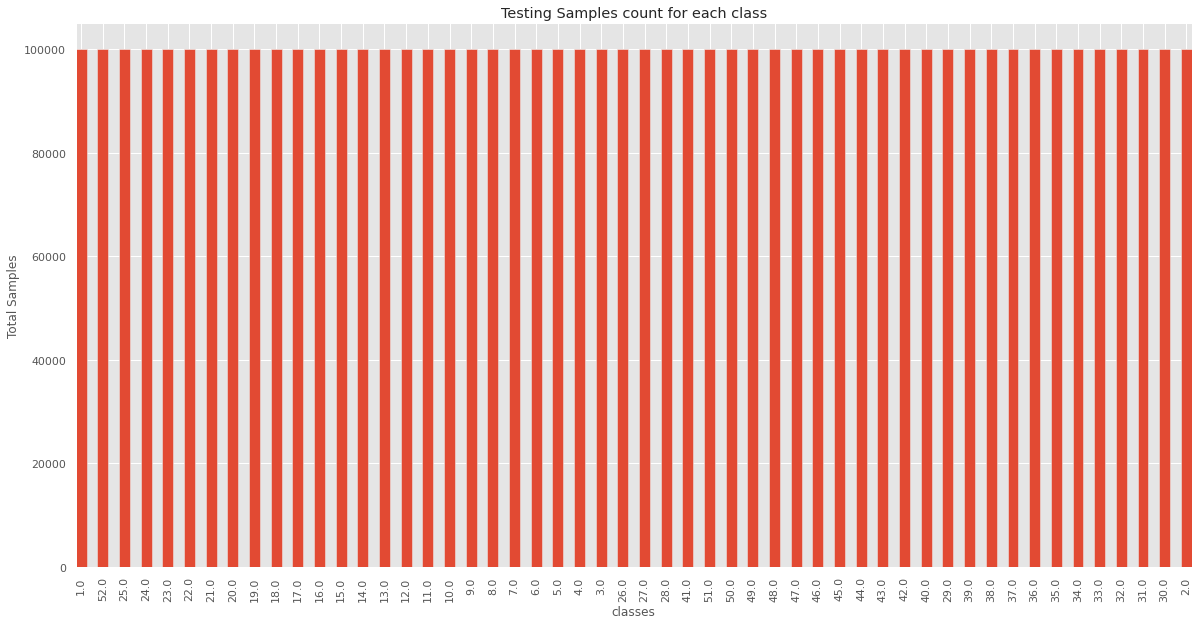

In [15]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
# Better understand how the recordings are spread across the different
# users who participated in the study
#df['user-id'].value_counts().plot(kind='bar',
#                                  title='Training Examples by User')

In [16]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
print('df_test_size',df_Test)

df_train_size             C1   C2   C3     C4    C5    C6    C7    C8    C9   C10  C11  C12  \
0          0.0 -1.0  1.0    1.0   1.0   1.0   0.0   1.0   1.0   0.0 -1.0 -5.0   
1          3.0  4.0  6.0    7.0   0.0  -8.0  -5.0  -7.0  -3.0  -1.0 -1.0  0.0   
2          7.0  9.0 12.0   14.0   0.0 -17.0 -10.0 -15.0  -7.0  -2.0  0.0  6.0   
3          9.0 13.0 17.0   19.0   0.0 -24.0 -14.0 -22.0 -10.0  -4.0  0.0 12.0   
4         11.0 16.0 21.0   23.0   0.0 -30.0 -17.0 -27.0 -12.0  -5.0  1.0 17.0   
...        ...  ...  ...    ...   ...   ...   ...   ...   ...   ...  ...  ...   
10399995 -55.0 59.0  8.0 -128.0 109.0  75.0 -60.0 -41.0 -31.0 -50.0 42.0 24.0   
10399996 -42.0 42.0  5.0 -114.0  88.0  61.0 -48.0 -33.0 -26.0 -43.0 36.0 17.0   
10399997 -29.0 27.0  1.0  -82.0  62.0  45.0 -35.0 -24.0 -21.0 -32.0 26.0 11.0   
10399998 -15.0 12.0 -3.0  -46.0  34.0  28.0 -22.0 -15.0 -17.0 -17.0 14.0  4.0   
10399999  -2.0 -1.0 -7.0   -9.0   4.0  11.0  -8.0  -7.0 -14.0   0.0  0.0 -1.0   

          Cla

In [17]:
# df_Train.iloc[0:4,0:n_features]
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:n_features])

In [18]:
scaler.mean_

array([-2.46317308e-03, -4.53134615e-03, -1.94230769e-05,  8.64903846e-04,
       -3.15548077e-03, -1.21182692e-03,  1.84153846e-03,  1.36125000e-03,
       -1.84230769e-04, -6.86826923e-04, -9.18730769e-03, -3.82692308e-04])

In [19]:
scaler.scale_

array([38.9434156 , 41.06662545, 38.78337427, 33.44085322, 33.1344395 ,
       32.40062901, 32.12090721, 35.98679668, 34.39411297, 40.84164598,
       43.07523873, 35.62757136])

In [20]:
result=df_Train.iloc[0:2,0:n_features].values
print(result)

[[ 0. -1.  1.  1.  1.  1.  0.  1.  1.  0. -1. -5.]
 [ 3.  4.  6.  7.  0. -8. -5. -7. -3. -1. -1.  0.]]


In [21]:
df_Train.iloc[:,0:n_features]=scaler.transform(df_Train.iloc[:,0:n_features])

In [22]:
result=df_Train.iloc[1:3,0:n_features].values
print(result)

[[ 7.70980955e-02  9.75130365e-02  1.54705967e-01  2.09298939e-01
   9.52326587e-05 -2.46871385e-01 -1.55719186e-01 -1.94553611e-01
  -8.72188730e-02 -2.44679946e-02 -2.30019083e-02  1.07414649e-05]
 [ 1.79811223e-01  2.19266405e-01  3.09411433e-01  4.18623742e-01
   9.52326587e-05 -5.24643771e-01 -3.11381041e-01 -4.16857365e-01
  -2.03517846e-01 -4.89528060e-02  2.13285125e-04  1.68419639e-01]]


In [23]:
result=df_Test.iloc[0:2,0:n_features].values
print(result)

[[ -3.   2.   0.   2.   1.   2.   5.  -3.   0.  -4.   1.  -2.]
 [ 20.   2.  -9.   8.  -8.  -7.  -5.  22.  -3.   1.   4. -16.]]


In [24]:
df_Test.iloc[:,0:12]=scaler.transform(df_Test.iloc[:,0:12])

In [25]:
result=df_Test.iloc[1:3,0:n_features].values
print(result)

[[ 0.51362889  0.04881169 -0.2320577   0.23920248 -0.2413454  -0.21600779
  -0.15571919  0.6112975  -0.08721887  0.02450163  0.09307406 -0.44907965]
 [ 1.12990765  0.04881169 -0.43833165  0.44852728 -0.51296611 -0.46291657
  -0.40477815  1.27820876 -0.1744431   0.14692569  0.18593483 -0.81396559]]


In [26]:
def create_segments_and_labels(df, time_steps,step, label_name):
    # x, y, z acceleration as features
    # N_FEATURES = 12
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
	#step = 200
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        c1s = df['C1'].values[i: i + time_steps]
        c2s = df['C2'].values[i: i + time_steps]
        c3s = df['C3'].values[i: i + time_steps]
        c4s = df['C4'].values[i: i + time_steps]
        c5s = df['C5'].values[i: i + time_steps]
        c6s = df['C6'].values[i: i + time_steps]
        c7s = df['C7'].values[i: i + time_steps]
        c8s = df['C8'].values[i: i + time_steps]
        c9s = df['C9'].values[i: i + time_steps]
        c10s = df['C10'].values[i: i + time_steps]
        c11s = df['C11'].values[i: i + time_steps]
        c12s = df['C12'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
      #  label_name - label_name.astype(int)
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s,c10s,c11s,c12s])
        # segments = pd.concat([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s, c10s], axis=1)
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [27]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (207998, 100, 12)
207998 training samples
y_train shape:  (207998,)
100
12
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (100, 12)
input_shape: (100, 12)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (207998, 52)


In [28]:
x_test, y_test = create_segments_and_labels(df_Test,
                                            TIME_PERIODS,
                                            STEP_DISTANCE,
                                            LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)
# score = model_m.evaluate(x_test, y_test_hot, verbose=1)
# print('\nAccuracy on test data: %0.2f' % score[1])
# print('\nLoss on test data: %0.2f' % score[0])

x_test shape:  (103998, 100, 12)
103998 testing samples
y_test shape:  (103998,)


In [29]:
# n_steps, n_length = 9, 57
# n_steps, n_length = 3, 171
n_steps, n_length = 100, 12
n_depth = 1
# n_steps, n_length = 19, 27
x_train = x_train.reshape((x_train.shape[0], n_steps, n_length, n_depth))
print('x_train shape: ', x_train.shape)
x_test = x_test.reshape((x_test.shape[0], n_steps, n_length, n_depth))
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (207998, 100, 12, 1)
x_test shape:  (103998, 100, 12, 1)
n_outputs 52


In [30]:
verbose, epochs, batch_size = 0, 500, 512

In [31]:
ker_random=tf.keras.initializers.RandomNormal(mean=0.0, stddev=4.190e-3, seed=None)

In [32]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer=ker_random,strides=(3,1), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
model.add(Activation('tanh'))
model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer=ker_random,strides=(2,1)))
model.add(Activation('tanh'))
model.add(Dropout(0.2093))
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dense(n_outputs, activation='softmax'))

In [33]:
adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/CNN100X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 34, 12, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 12, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 14, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 12, 64)         20544     
_________________________________________________________________
activation_1 (Activation)    (None, 7, 12, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 12, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 5376)              0

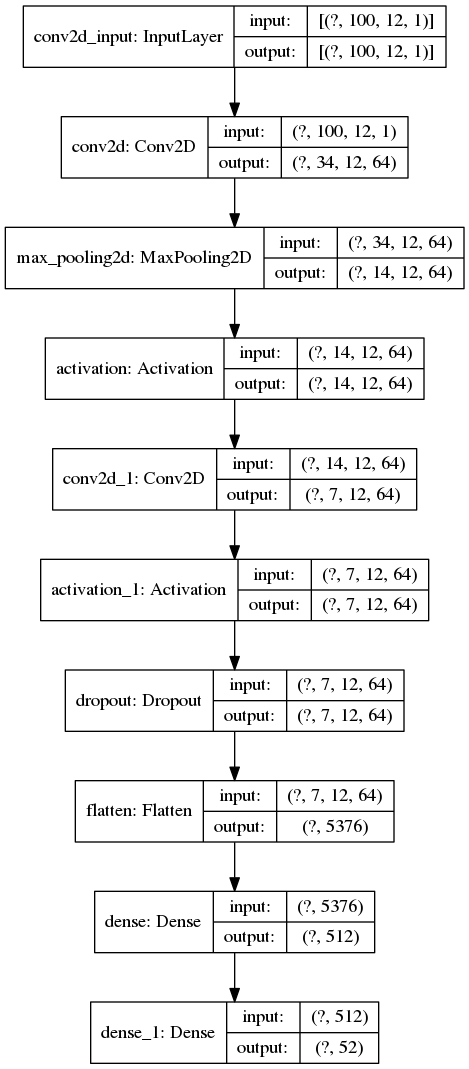

In [34]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/CNN100X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [35]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/CNN100X100/CNN_nina_100X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,early],validation_data=(x_test, y_test_hot),verbose=1)

Epoch 1/500
407/407 [==============================] - ETA: 0s - loss: 3.7408 - accuracy: 0.0566
Epoch 00001: val_accuracy improved from -inf to 0.06052, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/CNN100X100/checkpoint.hdf5
407/407 [==============================] - 18s 45ms/step - loss: 3.7408 - accuracy: 0.0566 - val_loss: 3.7052 - val_accuracy: 0.0605
Epoch 2/500
402/407 [============================>.] - ETA: 0s - loss: 3.6713 - accuracy: 0.0666
Epoch 00002: val_accuracy improved from 0.06052 to 0.06985, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/CNN100X100/checkpoint.hdf5
407/407 [==============================] - 6s 15ms/step - loss: 3.6711 - accuracy: 0.0665 - val_loss: 3.6414 - val_accuracy: 0.0698
Epoch 3/500
405/407 [============================>.] - ETA: 0s - loss: 3.6234 - accuracy: 0.0717
Epoch 00003: val_accuracy improved from 0.06985 to 0.07007, saving model to /media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/CNN

Epoch 27/500
403/407 [============================>.] - ETA: 0s - loss: 3.0154 - accuracy: 0.2022
Epoch 00027: val_accuracy did not improve from 0.08190
407/407 [==============================] - 6s 16ms/step - loss: 3.0159 - accuracy: 0.2021 - val_loss: 3.9585 - val_accuracy: 0.0669
Epoch 28/500
405/407 [============================>.] - ETA: 0s - loss: 2.9620 - accuracy: 0.2152
Epoch 00028: val_accuracy did not improve from 0.08190
407/407 [==============================] - 6s 15ms/step - loss: 2.9621 - accuracy: 0.2151 - val_loss: 4.0154 - val_accuracy: 0.0658
Epoch 29/500
403/407 [============================>.] - ETA: 0s - loss: 2.9179 - accuracy: 0.2253
Epoch 00029: val_accuracy did not improve from 0.08190
407/407 [==============================] - 6s 15ms/step - loss: 2.9180 - accuracy: 0.2254 - val_loss: 4.0630 - val_accuracy: 0.0642
Epoch 30/500
407/407 [==============================] - ETA: 0s - loss: 2.8737 - accuracy: 0.2343
Epoch 00030: val_accuracy did not improve from 

Epoch 56/500
401/407 [============================>.] - ETA: 0s - loss: 2.4346 - accuracy: 0.3326
Epoch 00056: val_accuracy did not improve from 0.08190
407/407 [==============================] - 5s 12ms/step - loss: 2.4346 - accuracy: 0.3326 - val_loss: 4.6695 - val_accuracy: 0.0567
Epoch 57/500
403/407 [============================>.] - ETA: 0s - loss: 2.4280 - accuracy: 0.3336
Epoch 00057: val_accuracy did not improve from 0.08190
407/407 [==============================] - 5s 12ms/step - loss: 2.4287 - accuracy: 0.3334 - val_loss: 4.7003 - val_accuracy: 0.0562
Epoch 58/500
404/407 [============================>.] - ETA: 0s - loss: 2.4201 - accuracy: 0.3354
Epoch 00058: val_accuracy did not improve from 0.08190
407/407 [==============================] - 5s 12ms/step - loss: 2.4212 - accuracy: 0.3351 - val_loss: 4.6926 - val_accuracy: 0.0546
Epoch 59/500
402/407 [============================>.] - ETA: 0s - loss: 2.4266 - accuracy: 0.3346
Epoch 00059: val_accuracy did not improve from 

Epoch 85/500
406/407 [============================>.] - ETA: 0s - loss: 2.3684 - accuracy: 0.3438
Epoch 00085: val_accuracy did not improve from 0.08190
407/407 [==============================] - 6s 15ms/step - loss: 2.3684 - accuracy: 0.3438 - val_loss: 4.7888 - val_accuracy: 0.0553
Epoch 86/500
402/407 [============================>.] - ETA: 0s - loss: 2.3666 - accuracy: 0.3451
Epoch 00086: val_accuracy did not improve from 0.08190
407/407 [==============================] - 6s 15ms/step - loss: 2.3673 - accuracy: 0.3449 - val_loss: 4.8056 - val_accuracy: 0.0556
Epoch 87/500
403/407 [============================>.] - ETA: 0s - loss: 2.3666 - accuracy: 0.3461
Epoch 00087: val_accuracy did not improve from 0.08190
407/407 [==============================] - 6s 16ms/step - loss: 2.3668 - accuracy: 0.3458 - val_loss: 4.7989 - val_accuracy: 0.0550
Epoch 88/500
407/407 [==============================] - ETA: 0s - loss: 2.3652 - accuracy: 0.3459
Epoch 00088: val_accuracy did not improve from 

In [36]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 9
train accuracy and validation accuracy 0.09833748638629913 0.08189580589532852


In [37]:
model.save('/media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/CNN100X100/CNN_nina_100X100')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB4_codes/olsson_DB4/CNN100X100/CNN_nina_100X100/assets


history loss
history accuracy
history val_loss
history val_accuracy


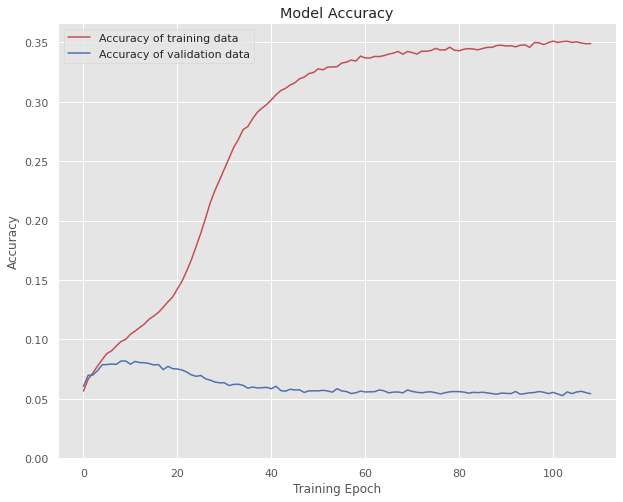

In [38]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy


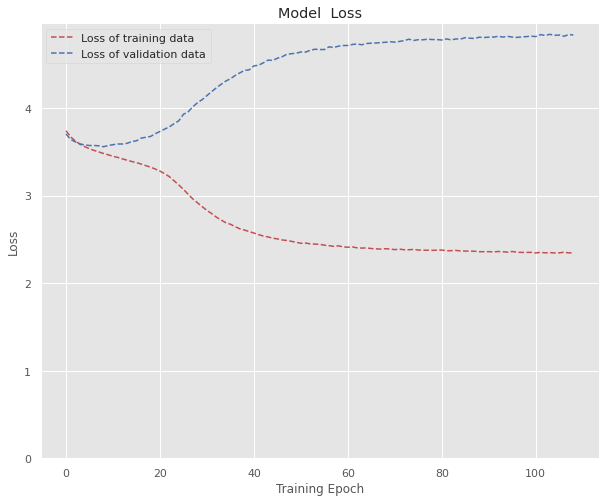

In [39]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [40]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

204/204 [==============================] - 1s 7ms/step - loss: 3.5592 - accuracy: 0.0819
test_accuracy 0.08189580589532852


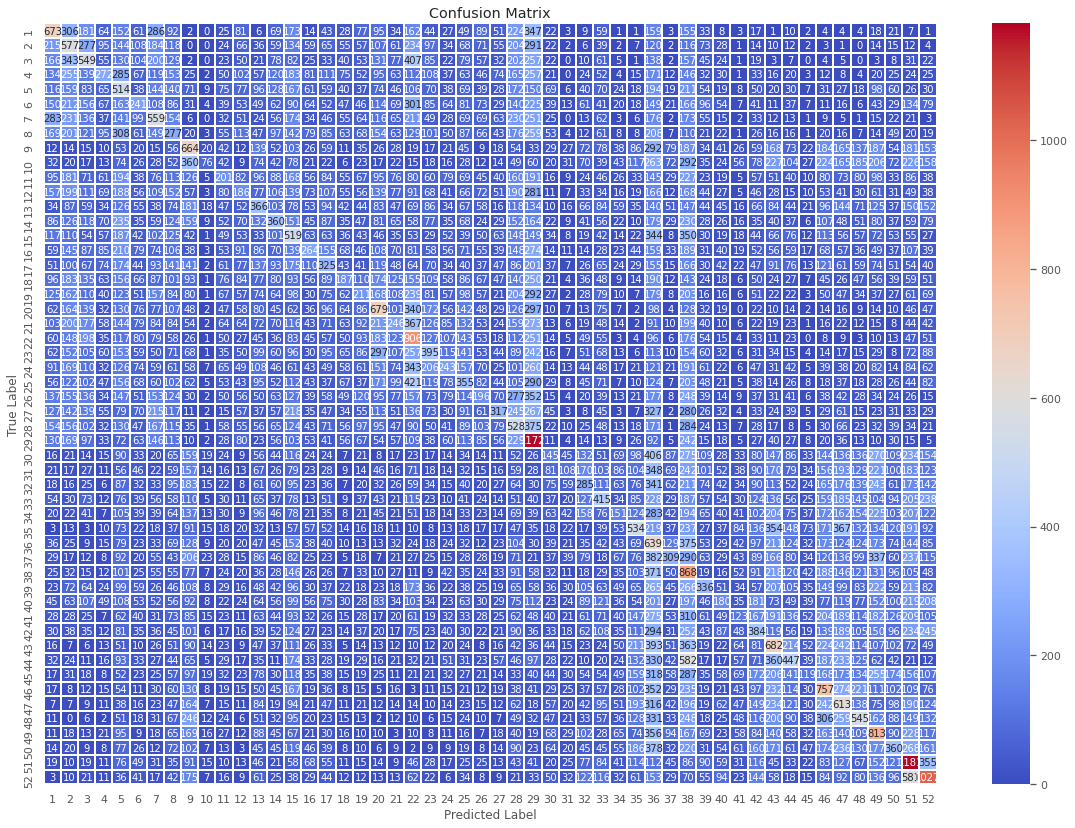

              precision    recall  f1-score   support

           0       0.16      0.17      0.16      4000
           1       0.10      0.14      0.12      4000
           2       0.13      0.14      0.13      4000
           3       0.13      0.07      0.09      4000
           4       0.08      0.13      0.10      4000
           5       0.09      0.06      0.07      4000
           6       0.13      0.14      0.13      4000
           7       0.06      0.07      0.06      4000
           8       0.12      0.17      0.14      4000
           9       0.17      0.02      0.03      4000
          10       0.10      0.05      0.07      4000
          11       0.08      0.05      0.06      4000
          12       0.10      0.09      0.10      4000
          13       0.11      0.09      0.10      4000
          14       0.08      0.13      0.10      4000
          15       0.11      0.07      0.08      4000
          16       0.10      0.08      0.09      4000
          17       0.10    

In [41]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

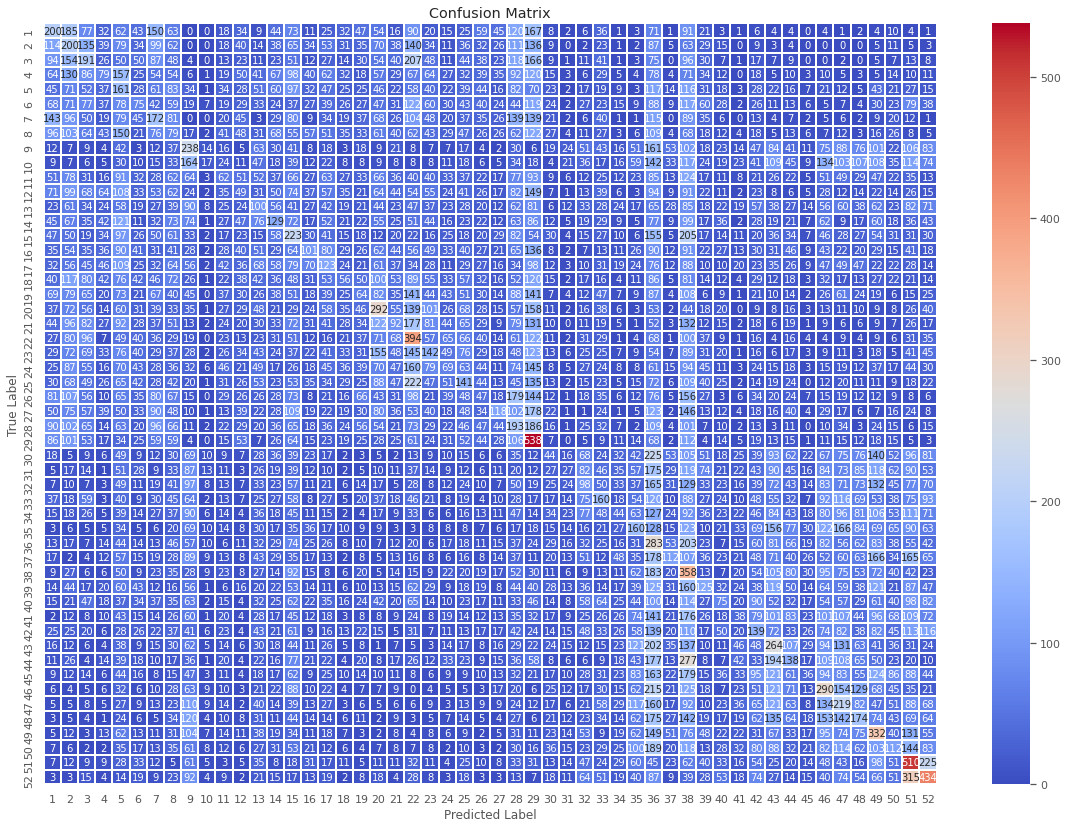

              precision    recall  f1-score   support

           0       0.10      0.10      0.10      2000
           1       0.07      0.10      0.08      2000
           2       0.09      0.10      0.09      2000
           3       0.08      0.04      0.05      2000
           4       0.05      0.08      0.06      2000
           5       0.06      0.04      0.05      2000
           6       0.09      0.09      0.09      2000
           7       0.04      0.04      0.04      2000
           8       0.09      0.12      0.10      2000
           9       0.08      0.01      0.02      2000
          10       0.06      0.03      0.04      2000
          11       0.05      0.02      0.03      2000
          12       0.06      0.05      0.05      2000
          13       0.08      0.06      0.07      2000
          14       0.07      0.11      0.09      2000
          15       0.09      0.05      0.06      2000
          16       0.07      0.06      0.07      2000
          17       0.06    

In [42]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))